In [1]:
# Importing the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_excel("Data set.xlsx")

In [3]:
df.head(10)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
5,2012.666667,7.1,2175.03000,3,24.96305,121.51254,3,828,32.1
6,2012.666667,34.5,623.47310,7,24.97933,121.53642,3,1115,40.3
7,2013.416667,20.3,287.60250,6,24.98042,121.54228,3,1316,46.7
8,2013.500000,31.7,5512.03800,1,24.95095,121.48458,1,588,18.8
9,2013.416667,17.9,1783.18000,3,24.96731,121.51486,2,1075,22.1


In [4]:
 df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [5]:
df.shape

(414, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [7]:
# Correlations in the data
df.corr()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
Transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.061985,0.068405,0.087529
House Age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567
Distance from nearest Metro station (km),0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613
Number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287
Number of bedrooms,0.061985,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265
House size (sqft),0.068405,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489
House price of unit area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000


In [8]:
## Check Correlation between features.

# Correlation

correlation = df.corr()

<AxesSubplot:>

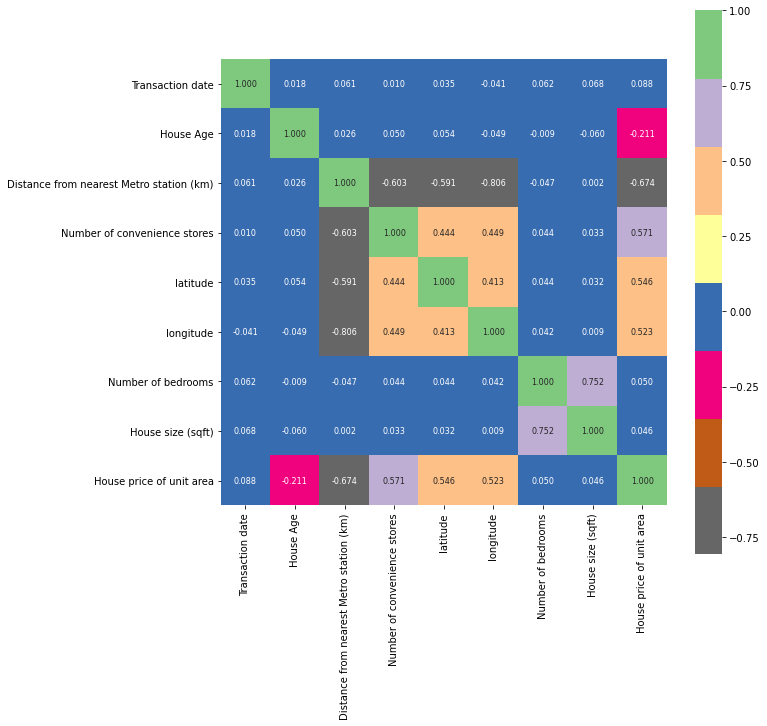

In [9]:
# constructing a heatmap to understand the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.3f', annot = True, annot_kws={'size':8}, cmap = 'Accent_r')

#### It is clearly evident that there is a strong positive association between latitude, longitude, and the number of stores. A good location and greater real estate prices will result from the presence of many convenience stores nearby.

#### Similar to this, there is a strong negative association between house age and the distance to the MRT station, which suggests that a property will be more expensive if it is older and closer to the MRT station.

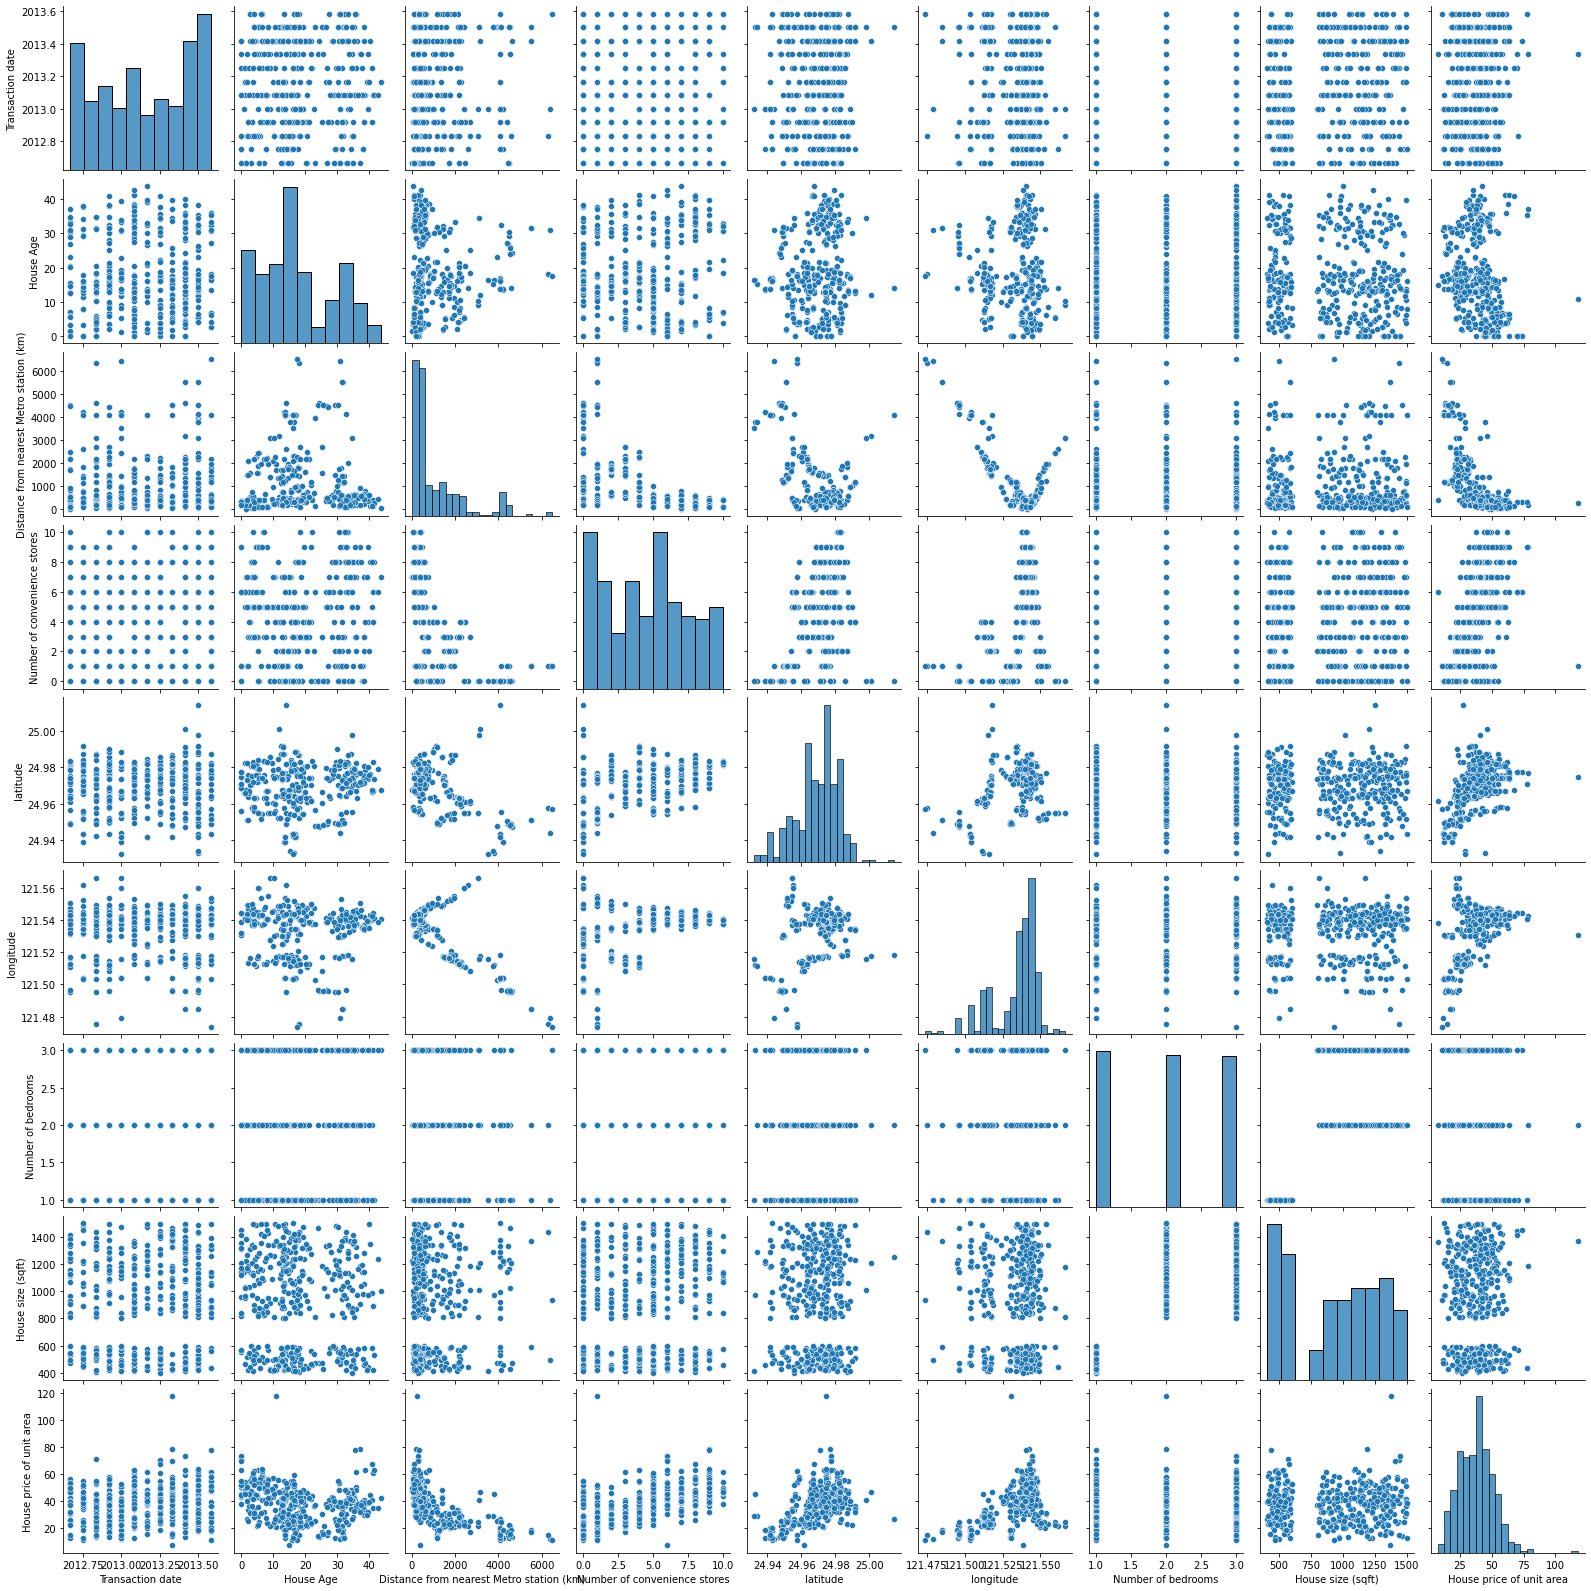

In [10]:
sns.pairplot(df)

Text(0.5, 1.0, 'Distribution of House Price per Unit Area')

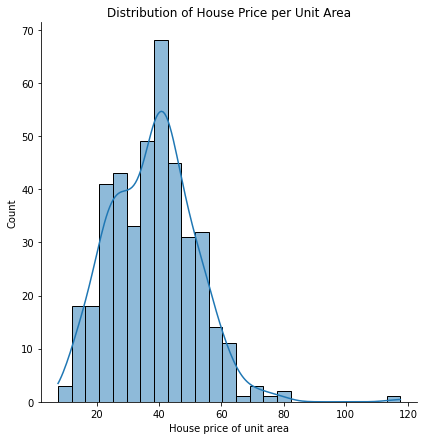

In [11]:
## Distribution of House Price ( Per Unit Area )

sns.displot(data= df, x='House price of unit area' , bins=25 , kde=True, height=6)
plt.title("Distribution of House Price per Unit Area")

Text(0.5, 1.0, 'Distribution Transaction date')

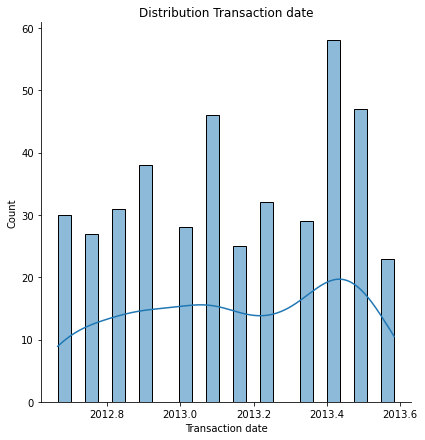

In [12]:
## Distribution Transaction date

sns.displot(data= df, x='Transaction date' , bins=25 , kde=True, height=6)
plt.title("Distribution Transaction date")

Text(0.5, 1.0, 'Distribution of House Age')

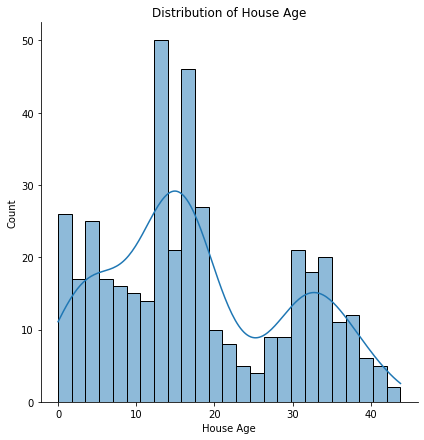

In [13]:
## Distribution of House Age

sns.displot(data= df, x='House Age' , bins=25 , kde=True, height=6)
plt.title("Distribution of House Age")

Text(0.5, 1.0, 'Distribution of distance to the nearest MRT station')

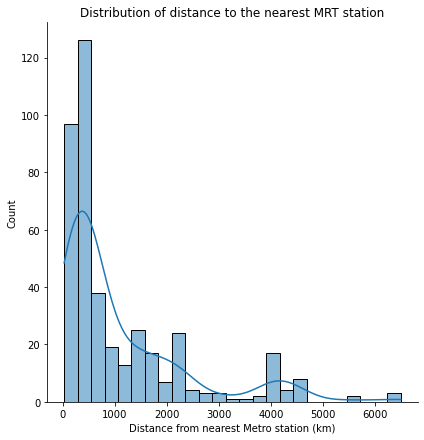

In [14]:
## Distribution of distance to the nearest MRT station

sns.displot(data= df, x='Distance from nearest Metro station (km)' , bins=25 , kde=True, height=6)
plt.title("Distribution of distance to the nearest MRT station")

Text(0.5, 1.0, 'Distribution of longitude')

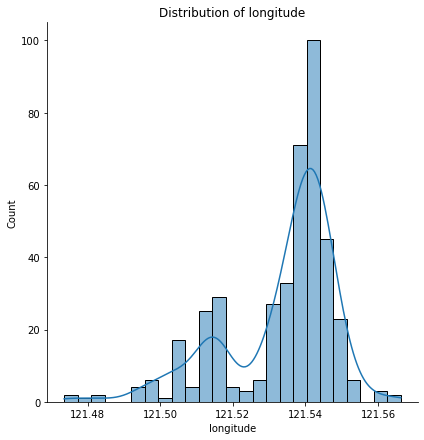

In [15]:
## Distribution of Longitude

sns.displot(data= df, x='longitude' , bins=25 , kde=True, height=6)
plt.title("Distribution of longitude")

Text(0.5, 1.0, 'Distribution of longitude')

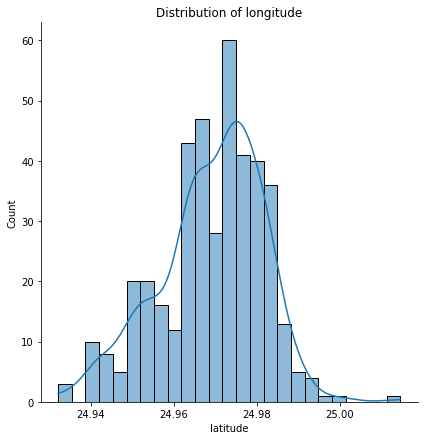

In [16]:
## Distribution of latitude

sns.displot(data= df, x='latitude' , bins=25 , kde=True, height=6)
plt.title("Distribution of longitude")

In [17]:
X = df.drop(columns= "House price of unit area", axis=1)
Y = df["House price of unit area"]

In [18]:
print(X.shape)
print(Y.shape)

(414, 8)
(414,)


In [19]:
# training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2)
print(X.shape, X_train.shape, X_test.shape)

(414, 8) (289, 8) (125, 8)


In [20]:
# fitting the model

model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [21]:
# coefficients of linear regression model
model.coef_

array([ 4.80282924e+00, -3.16641292e-01, -4.14958051e-03,  1.30653256e+00,
        1.95261724e+02,  8.76036795e+00,  1.71244213e-01,  1.08833376e-04])

In [22]:
pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])

,Coefficients
Transaction date,4.802829
House Age,-0.316641
Distance from nearest Metro station (km),-0.004150
Number of convenience stores,1.306533
latitude,195.261724
longitude,8.760368
Number of bedrooms,0.171244
House size (sqft),0.000109


In [23]:
# Predicting the values..
y_pred = model.predict(X_test)

In [24]:
y_pred

array([48.0050064 , 40.82314404, 30.72728829, 28.82670919, 33.47588843,
       36.23368158, 36.57962797, 26.97010292, 46.29366574, 55.07793759,
       44.63390433, 33.33192963, 44.66093338, 55.86610665, 51.83040899,
       31.44320498, 41.42143973, 35.46262136, 15.79619454, 23.86001094,
       40.76115109,  8.91354992, 41.92444976, 38.83113856, 26.01545588,
       31.62613606, 27.34059512, 50.57049066, 22.62509851, 44.5296604 ,
       55.37673023, 41.47353174, 39.60380652, 46.9064813 , 30.81144591,
       27.97495394, 48.35902266, 30.53997376, 32.7747326 , 22.41323394,
       31.15971907, 26.56260612, 54.1522098 , 33.08651811, 35.08581215,
       43.39000571, 46.42610456, 23.46656746, 35.61681781, 28.94460978,
       32.78653932, 41.24160602, 44.78954129, 42.16722962, 47.17002068,
       42.89689334, 44.61559415, 10.70314863, 48.69286266, 42.91889334,
       12.41660735, 48.69641977, 22.3072569 , 47.14604063, 30.47943063,
       37.60046864, 50.84605858, 30.13058278, 26.18910434, 14.70

In [25]:
# Finding the Error...
MAE= metrics.mean_absolute_error(Y_test, y_pred)
MSE=metrics.mean_squared_error(Y_test, y_pred)
RMSE= np.sqrt(MSE)

In [26]:
#Mean Squared Error
print(MSE)

107.9082834672653


In [27]:
# Root Mean Squared Error
print(RMSE)

10.387891194427544


In [28]:
# Mean absolute error
print(MAE)

6.5575532642726415


#### We used data to study real estate prices and identify the reasons behind them. Real estate price prediction using a sequential model is an interesting topic. Such prices are influenced by a variety of factors, and using a lot of data can be a great approach to perform predictive analytics and make forecasts. We looked at one of the many real-world applications of deep learning and machine learning.